Epoch 1/5
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.5219 - val_loss: 0.4653
Epoch 2/5
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4258 - val_loss: 0.4561
Epoch 3/5
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.4220 - val_loss: 0.4630
Epoch 4/5
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4196 - val_loss: 0.4579
Epoch 5/5
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4191 - val_loss: 0.4562
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.89      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962



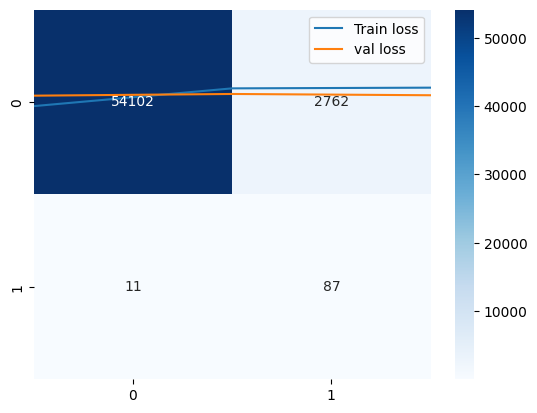

In [48]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('creditcard.csv')

df = df.drop(['Time'], axis=1)
X = df.drop(["Class"], axis=1)
y = df["Class"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

x_train = x_train[y_train == 0]

encoder = models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu')
])

decoder = models.Sequential([
    layers.Input(shape=(16,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')
])

autoencoder = models.Sequential([encoder, decoder])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

history = autoencoder.fit(
    x_train, x_train,
    validation_data=(x_test, x_test),
    epochs=5,
    batch_size=128,
    shuffle=True
)
plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

predication = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predication, 2), axis=1)

threshold = np.percentile(mse, 95)
anomalies = mse > threshold

cm = confusion_matrix(y_test, anomalies)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")

print(classification_report(y_test, anomalies))
